In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import glob

In [4]:
data = []
list = [pd.read_json(filename, lines=True) for filename in glob.glob("../week4/data/return-data/*.txt")]
df = pd.concat(list, axis=0)
df.head()

,basket,returnLabel,totalAmount,transactionId,zipCode
0,"[3, 1]",0,106,3520406327,7667
1,[1],0,50,6030070379,7647
2,"[1, 1, 5, 4, 1]",0,175,6579182382,2633
3,"[1, 2, 0, 1]",0,272,2779338441,4309
4,[2],0,14,3198368336,4659


In [5]:
df.drop(['transactionId','zipCode'],axis=1,inplace=True)
df.head()

,basket,returnLabel,totalAmount
0,"[3, 1]",0,106
1,[1],0,50
2,"[1, 1, 5, 4, 1]",0,175
3,"[1, 2, 0, 1]",0,272
4,[2],0,14


In [6]:
def categories(c, value):
    return c.count(value)

df['c_0'] = df['basket'].apply(lambda x: categories(x, 0))
df['c_1'] = df['basket'].apply(lambda x: categories(x, 1))
df['c_2'] = df['basket'].apply(lambda x: categories(x, 2))
df['c_3'] = df['basket'].apply(lambda x: categories(x, 3))
df['c_4'] = df['basket'].apply(lambda x: categories(x, 4))
df['c_5'] = df['basket'].apply(lambda x: categories(x, 5))

df.drop(['basket'],axis=1,inplace=True)

df.head()

,returnLabel,totalAmount,c_0,c_1,c_2,c_3,c_4,c_5
0,0,106,0,1,0,1,0,0
1,0,50,0,1,0,0,0,0
2,0,175,0,3,0,0,1,1
3,0,272,1,2,1,0,0,0
4,0,14,0,0,1,0,0,0


In [7]:
from sklearn.model_selection import train_test_split

X = df.drop(['returnLabel'],axis=1)
y = df['returnLabel']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50,random_state=0)

## Logistic Regression

In [8]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [9]:
logmodelpredictions = logmodel.predict(X_test)
logmodelprobabilities = logmodel.predict_proba(X_test)

## Random Forest

In [10]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [11]:
forestpredictions = forest.predict(X_test)
forestprobabilities = forest.predict_proba(X_test)

## ROC curve (predicitons)

### Logistic Regression

In [12]:
fpr, tpr, thresholds = roc_curve(y_test, logmodelpredictions)

In [13]:
fpr

array([0.        , 0.00332513, 1.        ])

In [14]:
tpr

array([0.        , 0.23326134, 1.        ])

In [15]:
thresholds

array([2, 1, 0], dtype=int64)

In [16]:
roc_auc = auc(fpr, tpr)
roc_auc

0.6149681038750923

### Random Forest

In [17]:
fpr2, tpr2, thresholds2 = roc_curve(y_test, forestpredictions)

In [18]:
fpr2

array([0.       , 0.0100419, 1.       ])

In [19]:
tpr2

array([0.        , 0.23758099, 1.        ])

In [20]:
thresholds2

array([2, 1, 0], dtype=int64)

In [21]:
roc_auc2 = auc(fpr2, tpr2)
roc_auc2

0.6137695484328003

### Plot

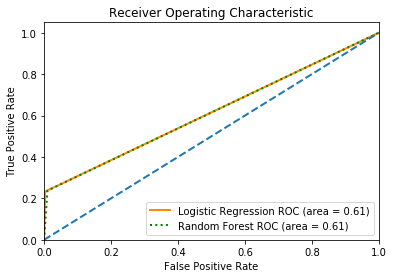

In [22]:
plt.figure()
lw = 2
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='Logistic Regression ROC (area = %0.2f)' % roc_auc)
plt.plot(fpr2, tpr2, color='green',
         lw=lw, linestyle=':', label='Random Forest ROC (area = %0.2f)' % roc_auc2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

## ROC curve (probabilities)

### Logistic Regression

In [23]:
fpr, tpr, thresholds = roc_curve(y_test, logmodelprobabilities[:, 1])

In [24]:
fpr

array([0.        , 0.        , 0.        , ..., 0.99514531, 0.99527831,
       1.        ])

In [25]:
tpr

array([0.        , 0.00215983, 0.07991361, ..., 1.        , 1.        ,
       1.        ])

In [26]:
thresholds

array([1.99840318e+00, 9.98403176e-01, 8.80900442e-01, ...,
       6.49952710e-10, 6.44950908e-10, 3.75548711e-12])

In [27]:
roc_auc = auc(fpr, tpr)
roc_auc

0.936785015967094

### Random Forest

In [28]:
fpr2, tpr2, thresholds2 = roc_curve(y_test, forestprobabilities[:, 1])

In [29]:
fpr2

array([0.00000000e+00, 1.33005254e-04, 1.33005254e-04, 9.97539403e-04,
       1.19704728e-03, 1.33005254e-03, 2.59360245e-03, 2.72660770e-03,
       2.72660770e-03, 2.79311033e-03, 2.92611558e-03, 2.99261821e-03,
       3.05912084e-03, 5.71922591e-03, 5.98523642e-03, 9.24386513e-03,
       9.31036776e-03, 9.50987564e-03, 9.57637827e-03, 9.77588615e-03,
       1.00418967e-02, 1.33005254e-02, 1.38325464e-02, 1.39655516e-02,
       1.44310700e-02, 1.45640753e-02, 1.47635832e-02, 1.48300858e-02,
       1.50295937e-02, 1.50960963e-02, 1.54951121e-02, 1.55616147e-02,
       1.56946199e-02, 1.58276252e-02, 1.60936357e-02, 2.10813327e-02,
       2.16133537e-02, 2.20123695e-02, 2.22118774e-02, 2.23448826e-02,
       2.24113852e-02, 2.24778879e-02, 2.24778879e-02, 2.27438984e-02,
       2.28104010e-02, 2.29434063e-02, 2.30099089e-02, 2.32759194e-02,
       2.34089247e-02, 2.36084325e-02, 2.36749352e-02, 2.38079404e-02,
       2.93276584e-02, 2.94606637e-02, 2.95271663e-02, 2.97266742e-02,
      

In [30]:
tpr2

array([0.        , 0.0237581 , 0.02807775, 0.0712743 , 0.0712743 ,
       0.07343413, 0.14470842, 0.14470842, 0.14686825, 0.14902808,
       0.14902808, 0.14902808, 0.1511879 , 0.20086393, 0.20086393,
       0.23542117, 0.23542117, 0.23542117, 0.23542117, 0.23542117,
       0.23758099, 0.28077754, 0.28077754, 0.28077754, 0.28293737,
       0.28725702, 0.28941685, 0.28941685, 0.29157667, 0.29157667,
       0.29157667, 0.2937365 , 0.29589633, 0.29589633, 0.29589633,
       0.33477322, 0.33693305, 0.33693305, 0.33693305, 0.33693305,
       0.33693305, 0.33909287, 0.3412527 , 0.3412527 , 0.3412527 ,
       0.3412527 , 0.34341253, 0.34341253, 0.34341253, 0.34341253,
       0.34341253, 0.34341253, 0.412527  , 0.412527  , 0.412527  ,
       0.412527  , 0.412527  , 0.41684665, 0.41684665, 0.41684665,
       0.41684665, 0.41684665, 0.41684665, 0.41684665, 0.41684665,
       0.41684665, 0.41684665, 0.41684665, 0.41684665, 0.41900648,
       0.41900648, 0.42116631, 0.42116631, 0.42332613, 0.47732

In [31]:
thresholds2

array([2.        , 1.        , 0.95      , 0.9       , 0.83333333,
       0.82166667, 0.8       , 0.79166667, 0.78333333, 0.775     ,
       0.75      , 0.73333333, 0.725     , 0.7       , 0.61666667,
       0.6       , 0.585     , 0.55      , 0.525     , 0.51666667,
       0.51333333, 0.5       , 0.475     , 0.46666667, 0.46333333,
       0.45833333, 0.45      , 0.44166667, 0.43333333, 0.425     ,
       0.42359793, 0.42333333, 0.42      , 0.40666667, 0.40357143,
       0.4       , 0.39166667, 0.38595238, 0.38095238, 0.36666667,
       0.35333333, 0.35      , 0.33333333, 0.33166667, 0.33      ,
       0.325     , 0.32333333, 0.32      , 0.31666667, 0.3102381 ,
       0.30690476, 0.30632395, 0.3       , 0.29166667, 0.28333333,
       0.26963203, 0.26666667, 0.265     , 0.26388889, 0.2630303 ,
       0.25833333, 0.25583333, 0.25095238, 0.25      , 0.24583333,
       0.24166667, 0.23333333, 0.23333333, 0.2325    , 0.22952381,
       0.22      , 0.2152381 , 0.21166667, 0.20057692, 0.2    

In [32]:
roc_auc2 = auc(fpr2, tpr2)
roc_auc2

0.7728678905926935

### Plot

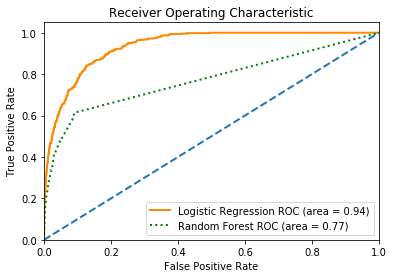

In [33]:
plt.figure()
lw = 2
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='Logistic Regression ROC (area = %0.2f)' % roc_auc)
plt.plot(fpr2, tpr2, color='green',
         lw=lw, linestyle=':', label='Random Forest ROC (area = %0.2f)' % roc_auc2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()